In [30]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

Veri seti; https://huggingface.co/datasets/papluca/language-identification/tree/main açık kaynaklı adresten indirilmiştir. Veriler fazla olduğu için modeli sadece test olarak ayrılan dosyadaki verilerden eğittim.

bu veri seti 20 farklı dilin 
* rabic (ar)
* bulgarian (bg)
* german (de)
* modern greek (el)
* english (en)
* spanish (es)
* french (fr)
* hindi (hi)
* italian (it)
* japanese (ja)
* dutch (nl)
* polish (pl)
* portuguese (pt)
* russian (ru)
* swahili (sw)
* thai (th)
* turkish (tr)
* urdu (ur)
* vietnamese (vi)
* chinese (zh)) 
metin detaylarını içeriyor. 
Her dil için değer sayısı;
test veri seti-> 500
validation veri seti -> 500
train veri seti -> 3500


### Modeli sadece test verisi ile eğitimde
doğruluk değeri;
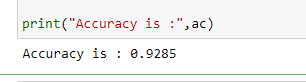

karmaşıklık matrisi; 
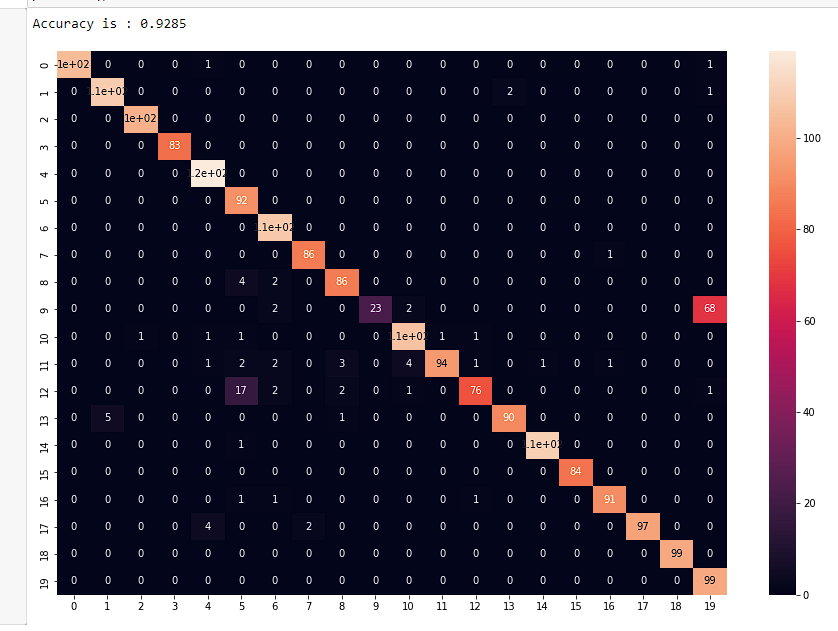


### Modeli test ve validation verisinin birleşimi ile eğitim sonucunda
doğruluk değeri;
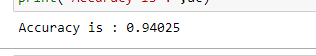
karmaşıklık matrisi;
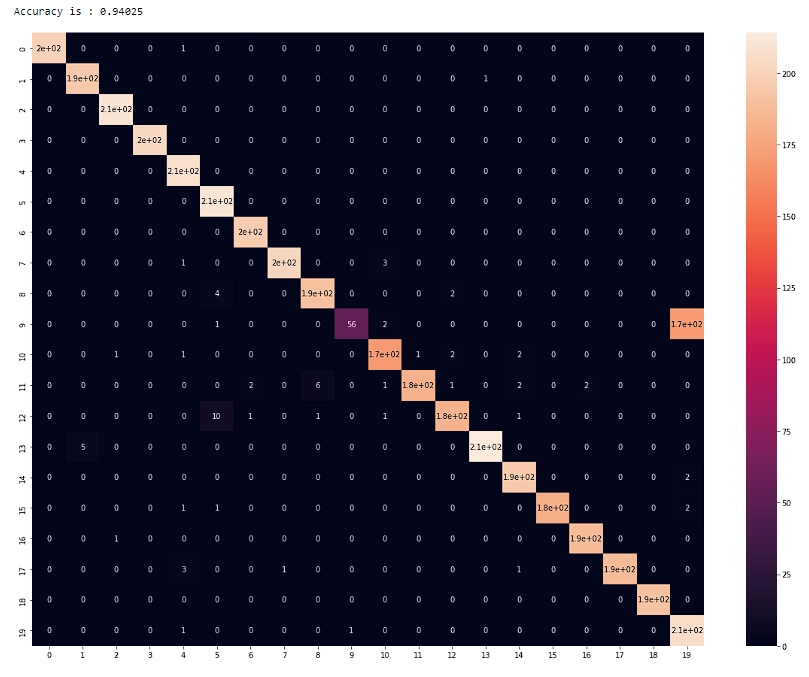

F1 score ve tahmin değerleri;
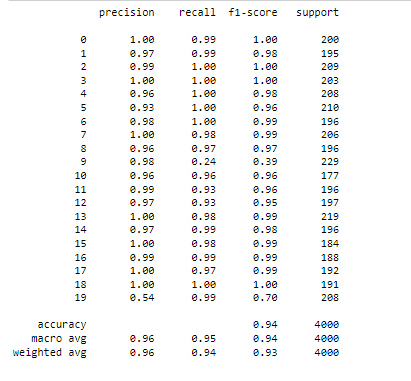

In [50]:
# data=pd.read_csv("train.csv")
data=pd.read_csv("test.csv")
valid=pd.read_csv("valid.csv")
data=pd.concat([data,valid])
data.head(20)

,labels,text
0,nl,Een man zingt en speelt gitaar.
1,nl,De technologisch geplaatste Nasdaq Composite I...
2,es,Es muy resistente la parte trasera rígida y lo...
3,it,"""In tanti modi diversi, l'abilità artistica de..."
4,ar,منحدر يواجه العديد من النقاشات المتجهه إزاء ال...
5,ru,Через каждые сто градусов пятна краски меняют ...
6,tr,"Sözlüğün yanı sıra, ortalama modern okuyucu iç..."
7,nl,Verschillende mensen op motorfietsen op een ma...
8,fr,"Bonjour, Le produit est conforme à la descript..."
9,es,"No funciona lo he devuelto, no hace nada"


In [51]:
data["labels"].value_counts()

nl    1000
es    1000
sw    1000
hi    1000
bg    1000
zh    1000
ur    1000
en    1000
pt    1000
th    1000
vi    1000
ja    1000
pl    1000
el    1000
fr    1000
tr    1000
ru    1000
ar    1000
it    1000
de    1000
Name: labels, dtype: int64

In [52]:
X = data["text"]
y = data["labels"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n""%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)



In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [54]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [55]:
y_pred = model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.94025


In [58]:
# Hassasiyet, geri çağırma ve F1 skoru
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.97      0.99      0.98       195
           2       0.99      1.00      1.00       209
           3       1.00      1.00      1.00       203
           4       0.96      1.00      0.98       208
           5       0.93      1.00      0.96       210
           6       0.98      1.00      0.99       196
           7       1.00      0.98      0.99       206
           8       0.96      0.97      0.97       196
           9       0.98      0.24      0.39       229
          10       0.96      0.96      0.96       177
          11       0.99      0.93      0.96       196
          12       0.97      0.93      0.95       197
          13       1.00      0.98      0.99       219
          14       0.97      0.99      0.98       196
          15       1.00      0.98      0.99       184
          16       0.99      0.99      0.99       188
          17       1.00    

Accuracy is : 0.94025


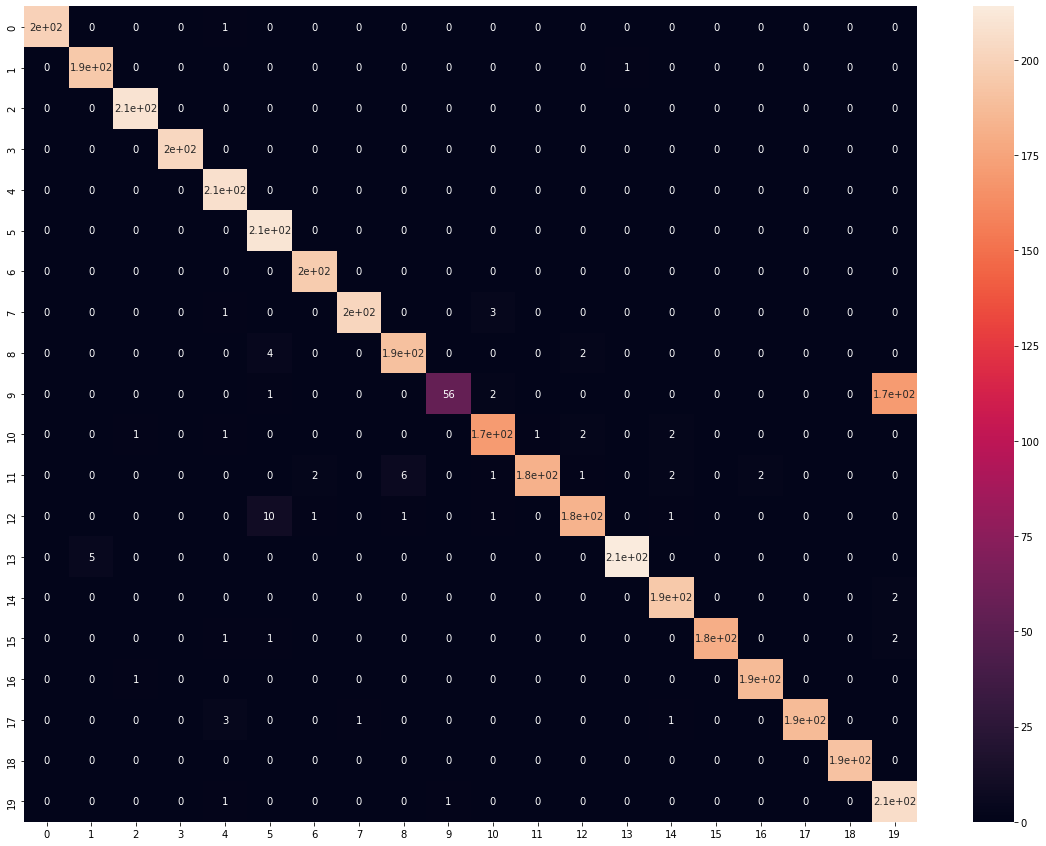

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9772727272727273

plt.figure(figsize=(20,15))
sns.heatmap(cm, annot = True)
plt.show()

In [75]:
def prediction(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [76]:
#arabic
prediction("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")


The langauge is in ar


In [77]:
# Spanish
prediction("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in es


In [78]:
# Russian
prediction("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in ru


In [79]:
# Turkey
prediction("Bu tamamen deneme metni")

The langauge is in tr


In [80]:
#arabic
prediction("سنلتقي في الساعة الثانية")

The langauge is in ar


In [100]:
#Turkey
prediction("Dil isleme")

The langauge is in tr
